In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv("../Datasets/Lung_Cancer_Clean_Data.csv")
df.head()

,Cancer_Level,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,1,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2
2,2,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,2,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,2,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3


C:\Users\cabon\miniconda3\envs\ai_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cancer_Level', ylabel='count'>

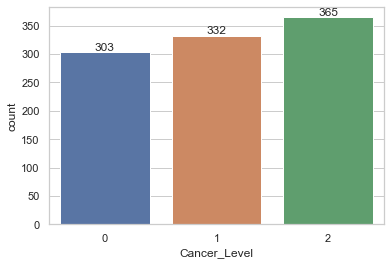

In [28]:
ax = sns.countplot(df.Cancer_Level)
for bar in ax.containers:
    ax.bar_label(bar)
sns.countplot(x="Cancer_Level", data=df)

In [11]:
cancer_level_0 = len(df[df["Cancer_Level"]==0])
pct_of_lvl_0 = cancer_level_0 / len(df["Cancer_Level"]) * 100

cancer_level_1 = len(df[df["Cancer_Level"]==1])
pct_of_lvl_1 = cancer_level_1 / len(df["Cancer_Level"]) * 100

cancer_level_2 = len(df[df["Cancer_Level"]==2])
pct_of_lvl_2 = cancer_level_2 / len(df["Cancer_Level"]) * 100

print(f"Amount of Patients at Cancer Level 0: {cancer_level_0}")
print(f"Percent of Patients at Cancer Level 0: {pct_of_lvl_0}%")
print(f"Amount of Patients at Cancer Level 1: {cancer_level_1}")
print(f"Percent of Patients at Cancer Level 1: {pct_of_lvl_1}%")
print(f"Amount of Patients at Cancer Level 2: {cancer_level_2}")
print(f"Percent of Patients at Cancer Level 2: {pct_of_lvl_2}%")

Amount of Patients at Cancer Level 0: 303
Percent of Patients at Cancer Level 0: 30.3%
Amount of Patients at Cancer Level 1: 332
Percent of Patients at Cancer Level 1: 33.2%
Amount of Patients at Cancer Level 2: 365
Percent of Patients at Cancer Level 2: 36.5%


In [12]:
dummy_df = df.copy(deep=True)

<AxesSubplot:>

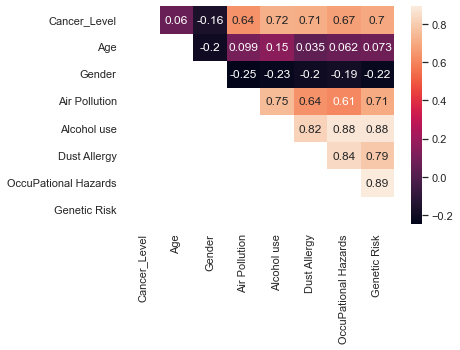

In [13]:
matrix = np.tril(dummy_df.iloc[:, 0:8].corr())
sns.heatmap(dummy_df.iloc[:, 0:8].corr(), annot=True, mask=matrix)

<AxesSubplot:>

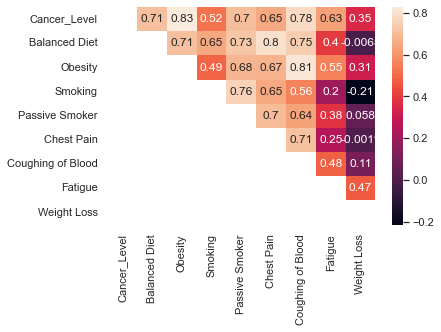

In [14]:
columns_to_drop = list(dummy_df.iloc[:, 1:9].columns.values)
dummy_df = dummy_df.drop(columns=columns_to_drop)

matrix = np.tril(dummy_df.iloc[:, 0:9].corr())
sns.heatmap(dummy_df.iloc[:, 0:9].corr(), annot=True, mask=matrix)

<AxesSubplot:>

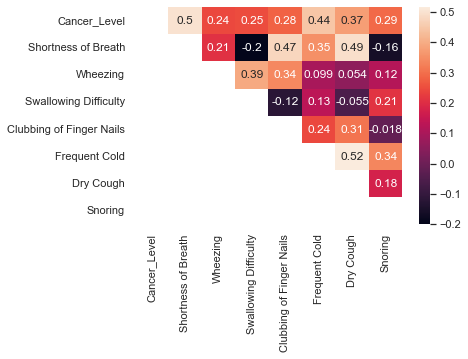

In [15]:
columns_to_drop = list(dummy_df.iloc[:, 1:9].columns.values)
dummy_df = dummy_df.drop(columns=columns_to_drop)

matrix = np.tril(dummy_df.iloc[:, 0:9].corr())
sns.heatmap(dummy_df.iloc[:, 0:9].corr(), annot=True, mask=matrix)

In [16]:
df.groupby("Cancer_Level").mean()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Cancer_Level,,,,,,,,,,,,,,,,,,,,,
0,35.412541,1.508251,2.600660,2.231023,3.112211,3.000000,2.732673,3.092409,3.000000,2.409241,...,2.861386,2.171617,2.501650,2.498350,2.574257,2.759076,2.468647,2.366337,2.914191,2.141914
1,38.620482,1.406627,2.933735,4.198795,5.442771,4.716867,4.292169,3.963855,3.512048,3.903614,...,3.846386,3.487952,4.415663,4.632530,4.756024,4.159639,4.936747,3.674699,3.695783,3.310241
2,37.320548,1.309589,5.693151,6.830137,6.616438,6.479452,6.375342,5.827397,6.619178,6.682192,...,7.438356,5.589041,4.468493,5.328767,3.884932,4.189041,4.208219,4.380822,4.775342,3.227397


## Train Test Split

In [17]:
y = df['Cancer_Level'].values
X = df.drop('Cancer_Level', axis=1)
X.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
680,27,2,3,1,4,2,3,2,3,3,...,2,2,2,3,4,1,5,2,6,2
177,45,1,3,2,4,2,3,2,3,3,...,3,4,5,6,5,5,4,6,5,4
395,55,1,3,1,1,1,2,3,4,1,...,3,2,5,2,1,2,3,4,5,2
911,29,2,6,7,7,7,7,6,7,7,...,7,2,7,6,7,6,7,2,3,1
793,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,33,1,6,7,7,7,7,7,6,7,...,7,8,5,7,6,7,8,7,6,2
270,24,2,1,2,2,3,2,4,2,3,...,1,1,1,1,2,3,4,5,2,1
860,36,2,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3
435,49,1,6,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2


In [19]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

## Logistic Regression

### Using newton-cg
More intensive on the computer to compute due to the amount of extra steps through Hessian Matrix. These extra steps are being made by it using both the first and second partial derivatives. Impressively was able to get a perfect training and testing score with few iterations

In [20]:
classifier_newton_cg = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2', max_iter=50)
classifier_newton_cg.fit(X_train, y_train)
print(f"Training Model Score: {classifier_newton_cg.score(X_train, y_train)}")
print(f"Testing Model Score: {classifier_newton_cg.score(X_test, y_test)}")

Training Model Score: 1.0
Testing Model Score: 1.0


In [21]:
y_pred = classifier_newton_cg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[156   0   0]
 [  0 156   0]
 [  0   0 188]]


### Using lbfgs
The default solver for Logistic Regression. Unlike the previous solver this is approximate and stores a few vectors that represent it. Performs exceptional but required more interations. An error occurs likely due to the size of the dataset. The upside to this is that is less intensive and saves up more memory

In [22]:
classifier_lbfgs = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', max_iter=200)
classifier_lbfgs.fit(X_train, y_train)
print(f"Training Model Score: {classifier_lbfgs.score(X_train, y_train)}")
print(f"Testing Model Score: {classifier_lbfgs.score(X_test, y_test)}")

Training Model Score: 1.0
Testing Model Score: 1.0


C:\Users\cabon\miniconda3\envs\ai_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_pred = classifier_lbfgs.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[156   0   0]
 [  0 156   0]
 [  0   0 188]]


### VIF (Variance inflation factor)
This is a measure of colinearity among the predictor variables. Colinearity is when two variables are highly correlated and contain similar information in the dataset. However multicolineratiy, is when three or more variables are highly correlated in the model. This can cause difficulty in distinguishing individual effects on the dependent variable 

In [24]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    features  vif_Factor
0                        Age    8.878553
1                     Gender    7.229196
2              Air Pollution   18.730416
3                Alcohol use   53.488354
4               Dust Allergy   50.521043
5       OccuPational Hazards  124.714056
6               Genetic Risk  112.607021
7       chronic Lung Disease   58.049623
8              Balanced Diet   38.343194
9                    Obesity   42.431869
10                   Smoking   16.088311
11            Passive Smoker   33.806212
12                Chest Pain   39.990682
13         Coughing of Blood   38.681090
14                   Fatigue   14.379270
15               Weight Loss   15.035395
16       Shortness of Breath   20.944738
17                  Wheezing   10.630942
18     Swallowing Difficulty   11.949525
19  Clubbing of Finger Nails   10.794104
20             Frequent Cold   11.774023
21                 Dry Cough   10.309063
22                   Snoring    8.787071
